# 2) IACOV - Model Development for Prognosis - DEATH
## Strategy 3) Training on hospitals of same region and testing on 30% of a specific hospital

Code below to import libraries when running this point forward

In [1]:
# !pip install npm nodejs

In [2]:
# !jupyter lab clean
# !jupyter lab build

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

In C:\Users\1511 MXTI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\1511 MXTI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\1511 MXTI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\1511 MXTI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\1511 MXTI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylel

In [2]:
#Put csv in same folder as this notebook
dataset = pd.read_csv("df_iacov_en.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(8494, 65)

In [3]:
df_iacov_model.columns

Index(['city_hospital', 'cd_patient', 'hospital_time', 'age', 'race', 'braden',
       'heart_rate', 'resp_rate', 'sys_press', 'dias_press', 'mean_press',
       'temp', 'saturation', 'weight', 'height', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'neutr_lymph_ratio', 'lymph_crp_ratio',
       'basophils', 'eosinophils', 'monocytes', 'crp', 'albumin', 'ldh', 'alt',
       'ast', 'total_bilirubin', 'direct_bilirubin', 'indirect_bilirubin',
       'urea', 'sodium', 'potassium', 'creatinine', 'troponin', 'd_dimer',
       'venous_lactate', 'cpk', 'inr', 'aptt', 'arterial_lactate', 'gas_ph',
       'gaso_po2', 'gas_paco2', 'gas_hco3', 'gas_be', 'gas_so2', 'magnesium',
       'calcium_ionised', 'total_calcium', 'glucose', 'state', 'region', 'icu',
       'death', 'mv', 'male'],
      dtype='object')

In [4]:
df_iacov_model.iloc[:,2:65].head(5)

,hospital_time,age,race,braden,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,...,magnesium,calcium_ionised,total_calcium,glucose,state,region,icu,death,mv,male
0,10.000,56.000,Pardo,nan,89.000,23.000,130.000,80.000,96.650,36.500,...,nan,nan,nan,nan,AM,NORTE,1,0,1,1.000
1,10.000,61.000,Pardo,nan,86.000,18.000,172.000,75.000,107.301,34.800,...,2.100,1.150,nan,nan,AM,NORTE,1,1,1,1.000
2,79.000,28.000,Pardo,nan,80.000,30.000,117.000,56.000,76.313,37.400,...,2.500,1.210,7.280,nan,AM,NORTE,1,0,1,1.000
3,15.000,69.000,Pardo,nan,68.000,nan,149.000,81.000,103.644,37.300,...,nan,nan,nan,nan,AM,NORTE,0,0,0,0.000
4,16.000,66.000,Pardo,nan,67.000,nan,124.000,75.000,91.317,36.600,...,2.100,nan,7.770,nan,AM,NORTE,1,0,1,1.000


## 2.1) Assign binary outcome to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [8]:
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'death'
                                      ,'region' #for filtering purposes
                                      ,'state' #for filtering purposes
                                     ]]
df_iacov_model_lean.shape

(8494, 26)

In [10]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

In [12]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(8494, 26)

In [13]:
df_all_hospitals.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'death', 'region', 'state'],
      dtype='object')

In [14]:
df_all_hospitals.region.value_counts()

SUDESTE        4201
NORDESTE       2389
CENTROOESTE     898
SUL             712
NORTE           294
Name: region, dtype: int64

In [15]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,19,0,object,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,0,0.000,98,0,float64,-0.114,8494.000,58.385,17.287,18.000,45.000,59.000,71.000,105.000
male,1,0.012,2,3814,float64,-0.205,8493.000,0.551,0.497,0.000,0.000,1.000,1.000,1.000
heart_rate,2654,31.246,184,0,float64,0.609,5840.000,86.017,17.388,13.000,75.000,85.000,96.000,233.000
resp_rate,3368,39.652,74,1,float64,6.066,5126.000,21.989,7.064,0.000,18.000,20.000,24.000,202.000
sys_press,3211,37.803,220,0,float64,70.917,5283.000,126.629,179.854,10.000,110.000,122.000,138.000,13090.000
dias_press,3202,37.697,155,0,float64,17.255,5292.000,74.777,18.972,6.000,67.000,76.000,81.000,931.000
mean_press,3644,42.901,1456,326,float64,-1.719,4850.000,83.867,28.192,0.000,78.977,90.000,98.500,235.000
temp,3115,36.673,129,1,float64,65.829,5379.000,36.438,4.744,0.000,36.000,36.300,36.800,372.000
hemoglobin,1984,23.358,250,0,float64,17.184,6510.000,12.766,3.096,1.400,11.500,13.000,14.300,133.000


In [16]:
import ipywidgets as widgets
from IPython.display import clear_output

Code omitted due to confidentiality

In [21]:
specific_hospital = 'Choose a hospital'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

In [22]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Hospital to train**

In [23]:
# !pip install ipywidgets

In [24]:
# !jupyter nbextension enable --py widgetsnbextension

In [25]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [27]:
#display(dropdown_hospital)

**Filter all hospitals except the selected above**

In [28]:
df_all_hospitals.region.value_counts()

SUDESTE        4201
NORDESTE       2389
CENTROOESTE     898
SUL             712
NORTE           294
Name: region, dtype: int64

**Split train/test of specific Hospital**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#Filter the specific hospital
df_iacov_model_lean_specific = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_iacov_model_lean_specific.shape

(1776, 26)

In [31]:
X_specific = df_iacov_model_lean_specific.drop(['death'],axis=1)
X_specific.shape

(1776, 25)

In [32]:
y_specific = df_iacov_model_lean_specific['death']
y_specific.shape

(1776,)

In [33]:
X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(X_specific, y_specific, test_size=0.30, random_state=42, stratify=y_specific)

In [34]:
X_train_specific.shape

(1243, 25)

In [35]:
X_test_specific.shape

(533, 25)

**Filter all hospitals on same region as specific** 

PS: Also removed GHC hospital due to very low positive cases

In [36]:
#Filter all hospitals from the same region of the left out hospital, except the left out hospital
#PS: Omitted hospital information
df_iacov_model_lean = df_all_hospitals[ (df_all_hospitals.region == df_all_hospitals[df_all_hospitals.city_hospital==specific_hospital].region.iloc[0]) &
                                        (df_all_hospitals.city_hospital != specific_hospital) & (df_all_hospitals.city_hospital != 'OMITTED')]

In [38]:
#check data without specific
#df_iacov_model_lean.city_hospital.value_counts()

In [40]:
#print("Specific: " + specific_hospital )
print("(training - all hospitals) dataset: " + str(df_iacov_model_lean.shape))

print("\n(training - specific) dataset: {}".format(X_train_specific.shape))

print("\n(test - specific) dataset: {}".format(X_test_specific.shape))

(training - all hospitals) dataset: (2425, 26)

(training - specific) dataset: (1243, 25)

(test - specific) dataset: (533, 25)


### 2.1.3) Dropping unused variables (All hospitals)

In [41]:
df_iacov_model_lean = df_iacov_model_lean.drop(['city_hospital'],axis=1)
df_iacov_model_lean.shape

(2425, 25)

In [42]:
#Preencho NAs com 0 
df_iacov_model_lean['death'] = df_iacov_model_lean['death'].fillna(0)
df_iacov_model_lean.death.value_counts()

0    1645
1     780
Name: death, dtype: int64

In [43]:
#Check proportion of deaths on training data 
(df_iacov_model_lean.death.value_counts()/len(df_iacov_model_lean.death))*100

0   67.835
1   32.165
Name: death, dtype: float64

**Set class**

In [44]:
df_iacov_model_lean['class'] = df_iacov_model_lean['death'].astype('int')
df_iacov_model_lean = df_iacov_model_lean.drop(['death'],axis=1)
df_iacov_model_lean.head()

,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,...,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,region,state,class
965,70.000,0.000,105.000,18.000,100.000,60.000,nan,36.300,12.900,105.000,...,10.440,9.291,0.731,nan,0.000,0.313,63.400,SUDESTE,ES,0
966,83.000,1.000,82.000,19.000,120.000,50.000,115.000,37.000,7.000,146.000,...,9.390,8.076,0.657,nan,0.000,0.125,87.800,SUDESTE,ES,1
967,56.000,0.000,97.000,20.000,nan,nan,86.000,37.000,6.000,211.000,...,14.170,8.300,1.417,nan,0.176,0.703,97.900,SUDESTE,ES,0
968,78.000,0.000,78.000,14.000,130.000,70.000,nan,nan,12.900,136.000,...,3.870,2.632,21.000,nan,0.077,0.310,12.600,SUDESTE,ES,0
969,90.000,1.000,82.000,nan,170.000,90.000,nan,nan,13.500,131.000,...,3.770,6.300,21.000,nan,0.000,0.000,86.200,SUDESTE,ES,0


### 2.1.4) Recalculating null mean_press

In [45]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [46]:
#Check mean_press missing before recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,95,0,float64,-0.264,2425.000,60.845,16.369,18.000,49.000,62.000,73.000,98.000
male,0,0.000,2,1075,float64,-0.228,2425.000,0.557,0.497,0.000,0.000,1.000,1.000,1.000
heart_rate,95,3.918,111,0,float64,0.488,2330.000,86.914,17.962,13.000,75.000,86.000,98.000,191.000
resp_rate,225,9.278,47,0,float64,2.887,2200.000,23.472,6.975,5.000,19.000,22.000,27.000,108.000
sys_press,138,5.691,139,0,float64,47.312,2287.000,128.570,272.121,10.000,110.000,120.000,137.000,13090.000
dias_press,140,5.773,97,0,float64,0.011,2285.000,73.589,14.715,6.000,64.000,73.000,81.000,160.000
mean_press,487,20.082,1019,0,float64,-0.293,1938.000,89.356,15.554,7.665,79.652,89.320,98.988,144.000
temp,227,9.361,66,0,float64,-2.633,2198.000,36.402,0.953,21.400,36.000,36.400,36.900,39.600
hemoglobin,1319,54.392,128,0,float64,19.213,1106.000,12.518,4.343,1.400,11.100,12.700,14.000,133.000
platelets,142,5.856,505,0,float64,0.939,2283.000,223190.216,106027.551,7.000,157000.000,209000.000,279000.000,992000.000


In [47]:
df_iacov_model_lean['mean_press'] = df_iacov_model_lean.apply(isNullMeanPressure, axis=1)

In [48]:
#Check mean_press missing after recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,95,0,float64,-0.264,2425.000,60.845,16.369,18.000,49.000,62.000,73.000,98.000
male,0,0.000,2,1075,float64,-0.228,2425.000,0.557,0.497,0.000,0.000,1.000,1.000,1.000
heart_rate,95,3.918,111,0,float64,0.488,2330.000,86.914,17.962,13.000,75.000,86.000,98.000,191.000
resp_rate,225,9.278,47,0,float64,2.887,2200.000,23.472,6.975,5.000,19.000,22.000,27.000,108.000
sys_press,138,5.691,139,0,float64,47.312,2287.000,128.570,272.121,10.000,110.000,120.000,137.000,13090.000
dias_press,140,5.773,97,0,float64,0.011,2285.000,73.589,14.715,6.000,64.000,73.000,81.000,160.000
mean_press,138,5.691,1072,0,float64,0.023,2287.000,91.326,16.678,7.665,80.000,90.985,100.651,180.000
temp,227,9.361,66,0,float64,-2.633,2198.000,36.402,0.953,21.400,36.000,36.400,36.900,39.600
hemoglobin,1319,54.392,128,0,float64,19.213,1106.000,12.518,4.343,1.400,11.100,12.700,14.000,133.000
platelets,142,5.856,505,0,float64,0.939,2283.000,223190.216,106027.551,7.000,157000.000,209000.000,279000.000,992000.000


In [49]:
column_summaries(df_iacov_model_lean_specific)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,1,0,object,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,0,0.000,81,0,float64,-0.193,1776.000,59.467,15.136,19.000,49.000,60.000,71.000,99.000
male,0,0.000,2,697,float64,-0.441,1776.000,0.608,0.488,0.000,0.000,1.000,1.000,1.000
heart_rate,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
resp_rate,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
sys_press,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
dias_press,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
mean_press,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
temp,1776,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
hemoglobin,67,3.773,134,0,float64,-0.621,1709.000,12.821,2.436,3.300,11.500,13.200,14.500,21.100


In [50]:
X_test_specific['mean_press'] = X_test_specific.apply(isNullMeanPressure, axis=1)

In [51]:
column_summaries(X_test_specific)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,1,0,object,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,0,0.000,75,0,float64,-0.091,533.000,58.878,15.536,20.000,48.000,60.000,70.000,99.000
male,0,0.000,2,222,float64,-0.340,533.000,0.583,0.493,0.000,0.000,1.000,1.000,1.000
heart_rate,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
resp_rate,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
sys_press,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
dias_press,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
mean_press,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
temp,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
hemoglobin,19,3.565,112,0,float64,-0.721,514.000,12.626,2.560,3.300,11.400,13.000,14.400,18.700


In [53]:
x_test_specific_name = 'X_test_same_region_vs_one_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
# x_test_specific_name

In [54]:
y_test_specific_name = 'y_death_same_region_vs_one_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
# y_test_specific_name

In [55]:
X_test_specific.to_csv(x_test_specific_name, sep=';')
X_test_specific.shape

(533, 25)

In [56]:
y_test_specific.to_csv(y_test_specific_name, sep=';')
y_test_specific.shape

(533,)

## 2.2) Prepare Experiment 

###  All hospitals on same region of specific hospital except specific hospital

In [57]:
df_iacov_model_lean.shape

(2425, 25)

In [58]:
df_iacov_model_train = df_iacov_model_lean

In [59]:
df_iacov_model_train = df_iacov_model_train.drop(['region'],axis=1)
df_iacov_model_train = df_iacov_model_train.drop(['state'],axis=1)
df_iacov_model_train.columns

Index(['age', 'male', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp', 'class'],
      dtype='object')

__Atention!__: If any Dtype is bool, cast to int32, otherwise experiment will fail

In [60]:
df_iacov_model_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 965 to 5627
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2425 non-null   float64
 1   male             2425 non-null   float64
 2   heart_rate       2330 non-null   float64
 3   resp_rate        2200 non-null   float64
 4   sys_press        2287 non-null   float64
 5   dias_press       2285 non-null   float64
 6   mean_press       2287 non-null   float64
 7   temp             2198 non-null   float64
 8   hemoglobin       1106 non-null   float64
 9   platelets        2283 non-null   float64
 10  hematocrit       663 non-null    float64
 11  red_cells_count  893 non-null    float64
 12  hcm              2268 non-null   float64
 13  rdw              2267 non-null   float64
 14  mcv              2268 non-null   float64
 15  leukocytes       2283 non-null   float64
 16  neutrophil       2152 non-null   float64
 17  lymphocytes 

In [61]:
exp = setup(df_iacov_model_train
            , target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 1.0 #100pct for training
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(2425, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [62]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [63]:
X_train.shape

(2302, 22)

In [64]:
X_test.shape

(728, 22)

In [65]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

In [66]:
X_test.head()

,age,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,...,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,male_0.0
1550,-0.968,0.518,0.701,-0.019,-0.319,-0.267,0.439,0.028,-0.810,0.055,...,-0.008,-0.982,-0.346,-0.640,-0.066,-0.146,-0.180,-0.530,-0.209,0.000
1352,0.621,-0.504,-1.102,-0.140,-0.669,-1.131,-1.546,0.028,-0.761,0.055,...,-0.557,-1.277,0.016,-0.107,-0.048,-0.146,-0.180,-0.527,-0.281,0.000
2481,-0.907,-0.277,-0.201,0.125,3.532,2.780,0.660,0.028,-0.344,0.055,...,-0.282,0.451,0.260,0.549,-0.058,-0.145,-0.180,-0.530,-0.264,1.000
5321,-0.235,-0.504,-0.501,-0.031,0.451,0.105,1.101,-0.142,-0.829,-0.698,...,-0.488,1.532,-0.318,-0.748,0.026,-0.145,-0.180,0.394,0.293,0.000
1447,-0.235,0.007,-0.802,0.049,-0.949,-0.268,0.219,0.028,0.677,0.055,...,0.507,-0.406,-0.591,-1.095,-0.073,-0.144,-0.180,-0.531,-0.314,0.000


In [67]:
seed

42

In [68]:
# Xtrain.head()

### Filtering only 5 pre-selected models

In [69]:
# print(inspect.getsource(compare_models))

In [70]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
# compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","mlp","ridge","qda","ada","gbc","lda", "rf" ,"et"] , turbo = False)
# compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","lightgbm"] , turbo = False)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.870600,0.942100,0.925400,0.815800,0.833700,0.875900,0.741100,0.000000,0.077400,0.601800
1,Light Gradient Boosting Machine,0.864000,0.939800,0.925400,0.802700,0.824500,0.870600,0.728100,0.010800,0.397200,0.609900
2,CatBoost Classifier,0.854500,0.921000,0.901000,0.808000,0.824600,0.859900,0.708900,0.154800,0.074000,0.540800


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [71]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.857,0.935,0.845,0.870,0.867,0.856,0.714,0.102,0.028,0.579
1,0.883,0.963,0.922,0.845,0.855,0.887,0.766,0.010,0.276,0.678
2,0.830,0.899,0.826,0.835,0.833,0.830,0.661,0.000,0.002,0.491
3,0.835,0.923,0.852,0.817,0.824,0.838,0.670,0.016,0.001,0.529
4,0.826,0.921,0.852,0.800,0.810,0.831,0.652,0.000,0.000,0.506
5,0.904,0.988,1.000,0.809,0.839,0.913,0.809,0.000,0.513,0.729
6,0.909,0.985,1.000,0.817,0.846,0.916,0.817,0.000,0.113,0.715
7,0.926,0.992,1.000,0.852,0.871,0.931,0.852,0.000,0.545,0.795
8,0.913,0.991,1.000,0.826,0.852,0.920,0.826,0.000,0.951,0.758
9,0.917,0.997,1.000,0.835,0.858,0.924,0.835,0.000,0.781,0.769


In [72]:
cattuned.feature_names_

['age',
 'heart_rate',
 'resp_rate',
 'sys_press',
 'dias_press',
 'mean_press',
 'temp',
 'hemoglobin',
 'platelets',
 'hematocrit',
 'red_cells_count',
 'hcm',
 'rdw',
 'mcv',
 'leukocytes',
 'neutrophil',
 'lymphocytes',
 'basophils',
 'eosinophils',
 'monocytes',
 'crp',
 'male_0.0']

In [73]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.818,0.929,0.879,0.756,0.785,0.829,0.636,0.000,0.000,0.455
1,0.853,0.960,0.957,0.750,0.791,0.866,0.706,0.000,0.000,0.561
2,0.783,0.893,0.852,0.713,0.748,0.797,0.565,0.000,0.000,0.349
3,0.822,0.919,0.913,0.730,0.772,0.837,0.643,0.000,0.000,0.437
4,0.809,0.926,0.887,0.730,0.767,0.823,0.617,0.000,0.000,0.425
5,0.861,0.978,1.000,0.722,0.782,0.878,0.722,0.000,0.000,0.544
6,0.857,0.987,1.000,0.713,0.777,0.875,0.713,0.000,0.000,0.546
7,0.865,0.989,1.000,0.730,0.788,0.881,0.730,0.000,0.000,0.594
8,0.865,0.988,1.000,0.730,0.788,0.881,0.730,0.000,0.000,0.608
9,0.891,0.993,1.000,0.783,0.821,0.902,0.783,0.000,0.000,0.602


In [74]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.809,0.928,0.914,0.704,0.757,0.828,0.619,0.007,0.457,0.517
1,0.831,0.940,0.965,0.698,0.760,0.851,0.663,0.000,0.510,0.528
2,0.796,0.869,0.878,0.713,0.754,0.811,0.591,0.002,0.007,0.385
3,0.817,0.905,0.922,0.713,0.763,0.835,0.635,0.000,0.230,0.470
4,0.844,0.924,0.930,0.756,0.793,0.856,0.687,0.005,0.658,0.514
5,0.844,0.949,1.000,0.687,0.762,0.865,0.687,0.000,0.114,0.521
6,0.857,0.955,1.000,0.713,0.777,0.875,0.713,0.000,0.040,0.541
7,0.852,0.977,1.000,0.704,0.772,0.871,0.704,0.000,0.798,0.587
8,0.874,0.955,1.000,0.748,0.799,0.888,0.748,0.000,0.570,0.599
9,0.861,0.971,1.000,0.722,0.782,0.878,0.722,0.000,0.924,0.587


In [75]:
# X_train.isna().sum()

### Best Model
Selected manually based on AUC, next Precision

In [76]:
preds = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.761,0.790,0.551,0.860,0.651,0.597,0.429,0.000,0.000,0.177


In [77]:
preds = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.732,0.796,0.658,0.767,0.573,0.612,0.409,0.000,0.000,0.058


In [78]:
preds = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.724,0.791,0.684,0.743,0.557,0.614,0.403,0.000,0.000,0.117


### Best model

In [80]:
preds = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.732,0.796,0.658,0.767,0.573,0.612,0.409,0.000,0.000,0.058


In [81]:
npv(y_test, preds['Label'])

0.8257080610021786

In [82]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'])]

['0.76', '0.83']

,,
,,
Ground Truth Prevalence,. . .,0.321
Test set Prevalence,. . .,0.370
True positive rate (recall),. . .,0.658
False positive rate,. . .,0.233
Positive predictive value (precision),. . .,0.572
True negative rate (specificity),. . .,0.767
False negative rate,. . .,0.342
Negative predictive value,. . .,0.826
Positive likelihood ratio (bigger is better),. . .,2.827


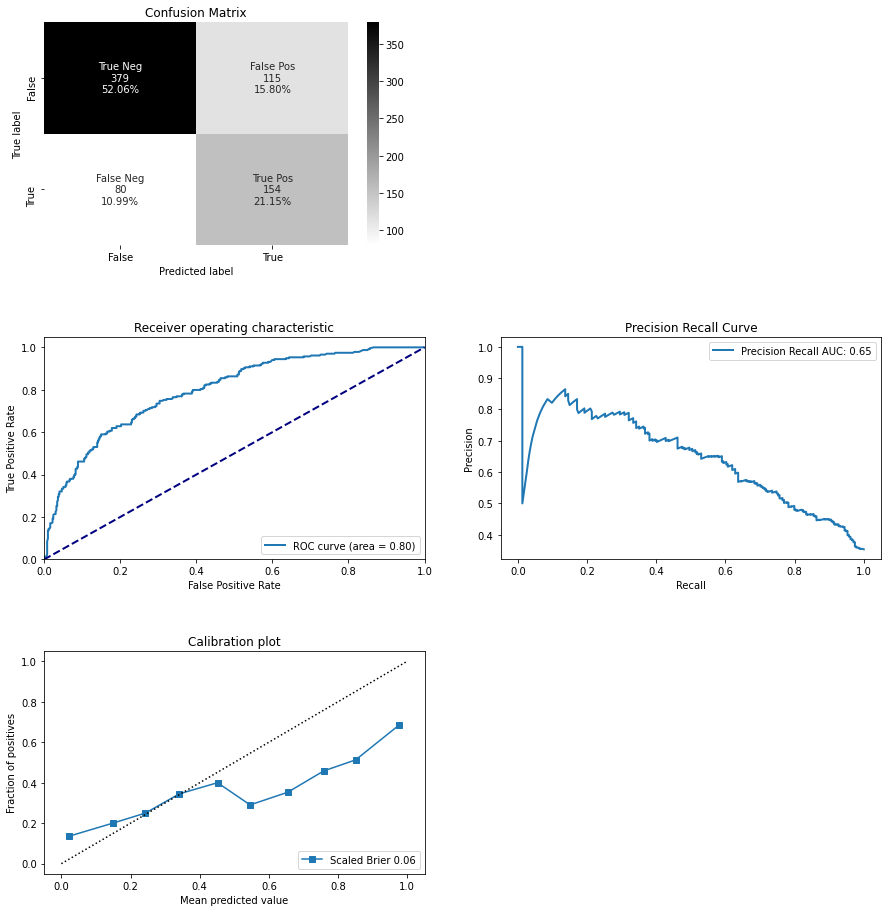

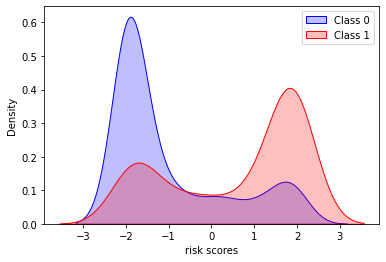

,,
,,
Ground Truth Prevalence,. . .,0.321
Test set Prevalence,. . .,0.370
True positive rate (recall),. . .,0.658
False positive rate,. . .,0.233
Positive predictive value (precision),. . .,0.572
True negative rate (specificity),. . .,0.767
False negative rate,. . .,0.342
Negative predictive value,. . .,0.826
Positive likelihood ratio (bigger is better),. . .,2.827


In [83]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds["Label"], preds["Score"])

### Understand best algorithm features and results

In [85]:
evaluate_model(lgbmtuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

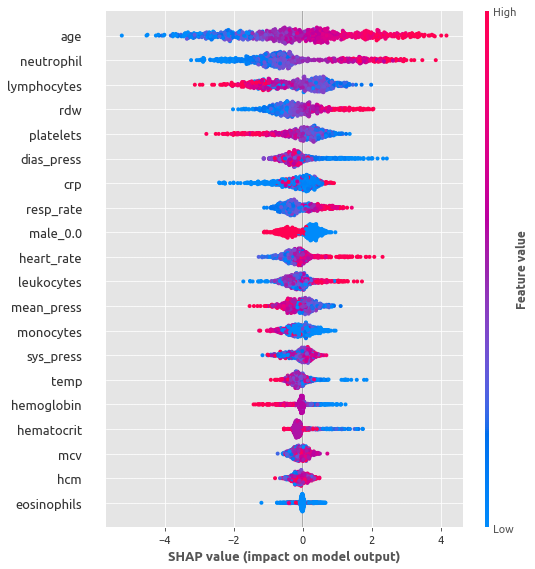

In [86]:
interpret_model(lgbmtuned)

In [87]:
plot_model(lgbmtuned, plot='ktops')

IntProgress(value=0, description='Processing: ', max=5)

Using 20% rows of the test set (n = 145)


,prob,predicted_class,real,result
567,1.000,1,1,1
702,1.000,1,1,1
471,1.000,1,1,1
574,1.000,1,0,0
661,1.000,1,0,0
...,...,...,...,...
115,0.929,1,1,1
466,0.928,1,0,0
74,0.926,1,0,0
246,0.925,1,1,1


Positive rows in the test set= 234
True positive predictions in the 20% k-tops =  102
% of accuracy = 43.58974358974359%


In [100]:
# cattuned

### 2.3.1) Build a model with all data

In [88]:
final_model = finalize_model(lgbmtuned)

In [89]:
str(final_model.__class__.__name__)

'LGBMClassifier'

In [90]:
final_model_name = str(final_model.__class__.__name__) + '_same_region_vs_one_' \
                    + X_test_specific.region.iloc[0]  \
                    + '_' + X_test_specific.state.iloc[0]  \
                    + '_' + X_test_specific.city_hospital.iloc[0]
# final_model_name

In [91]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [92]:
final_model

LGBMClassifier(colsample_bytree=0.8802485778485463, n_estimators=1067,
               num_leaves=101, random_state=42, reg_alpha=0.41582108757945346,
               reg_lambda=0.8716519284632148, scale_pos_weight=11)

# Use the saved model to predict on specific hospital

In [94]:
import pickle
import joblib

#Carrego o modelo unico
# print('loaded: ' + final_model_name)
all_except_one_model_pkl = final_model_name + ".pkl"
prep_pipe_all_except_one, all_except_one_model = joblib.load(all_except_one_model_pkl)

In [95]:
all_except_one_model.__class__.__name__

'LGBMClassifier'

In [96]:
# x_test_specific_name

In [97]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)
X_test_single.shape

(533, 25)

In [98]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state'],
      dtype='object')

In [99]:
# X_train.columns

In [100]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)
y_test_single = y_test_single["death"]
y_test_single.shape

(533,)

In [102]:
pd.set_option('display.max_columns', None)
# X_test_single.head()

In [103]:
X_test_single["class"] = y_test_single

In [104]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state', 'class'],
      dtype='object')

In [105]:
X_test_single = X_test_single.drop(['city_hospital'],axis=1)
X_test_single = X_test_single.drop(['region'],axis=1)
X_test_single = X_test_single.drop(['state'],axis=1)

In [106]:
X_test_single_transformed = prep_pipe_all_except_one.fit_transform(X_test_single)
X_test_single_transformed.head()

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
male,Categorical
heart_rate,Categorical
resp_rate,Numeric
sys_press,Categorical
dias_press,Categorical
mean_press,Categorical
temp,Categorical
hemoglobin,Numeric
platelets,Numeric


,class,age,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,male_1.0
5959,1,0.459,1.258,0.451,1.251,0.874,0.711,-0.198,0.694,0.179,1.432,0.480,-0.093,-0.255,0.016,1.000
6979,0,0.266,0.581,1.359,0.763,1.481,-1.547,0.253,-1.355,-0.124,-0.003,0.571,5.643,1.448,-0.914,1.000
7146,0,0.072,0.064,-1.482,0.018,0.115,-0.477,0.366,-0.648,0.105,-1.533,-1.216,-0.689,-0.351,-1.191,0.000
6938,1,1.296,0.621,-0.133,0.574,0.377,0.354,-0.198,0.228,-0.093,0.359,0.021,-0.018,-0.255,0.486,0.000
6514,0,-1.281,1.855,1.193,1.724,1.730,0.394,-0.930,0.072,-0.118,0.219,0.461,-0.018,-0.255,0.009,1.000


In [107]:
X_test_single_transformed = X_test_single_transformed.drop(['class'],axis=1)

In [108]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

In [109]:
X_test_single_transformed.columns

Index(['age', 'hemoglobin', 'platelets', 'hematocrit', 'red_cells_count',
       'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes',
       'basophils', 'eosinophils', 'monocytes', 'male_1.0'],
      dtype='object')

In [110]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single_transformed.columns)].columns.tolist()
distinct_columns

['crp',
 'dias_press',
 'heart_rate',
 'male_0.0',
 'mean_press',
 'resp_rate',
 'sys_press',
 'temp']

In [111]:
X_test_single_transformed.shape

(533, 15)

In [112]:
X_test_single_transformed.columns

Index(['age', 'hemoglobin', 'platelets', 'hematocrit', 'red_cells_count',
       'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes',
       'basophils', 'eosinophils', 'monocytes', 'male_1.0'],
      dtype='object')

### Add missing columns to some hospitals that didn't collect all columns
e.g. HC_USP (missing: red_cells_count and eosinophils)

In [113]:
for column in distinct_columns:
    if(column=='male_0.0'):
        X_test_single_transformed['male_0.0'] = X_test_single_transformed['male_1.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_1.0', axis=1)
    else:
        X_test_single_transformed[column]=np.NaN

In [114]:
X_test_single_transformed.columns

Index(['age', 'hemoglobin', 'platelets', 'hematocrit', 'red_cells_count',
       'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes',
       'basophils', 'eosinophils', 'monocytes', 'crp', 'dias_press',
       'heart_rate', 'male_0.0', 'mean_press', 'resp_rate', 'sys_press',
       'temp'],
      dtype='object')

In [115]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

**Reorder columns**

In [116]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [117]:
# Reorder columns
X_test_single_transformed = X_test_single_transformed[X_test.columns]
X_test_single_transformed.shape

(533, 22)

In [119]:
X_test_same_region_vs_one_name = 'X_test_same_region_vs_one_transformed_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
# X_test_same_region_vs_one_name

In [120]:
X_test_single_transformed.to_csv(X_test_same_region_vs_one_name, sep=';')

0.6803065900916581


[<matplotlib.lines.Line2D at 0x2df175e7808>]

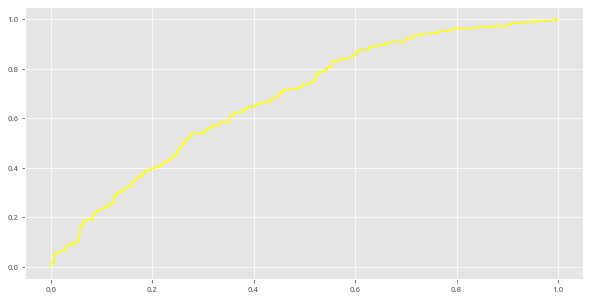

In [121]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)

y_pred_prob1 = all_except_one_model.predict_proba(X_test_single_transformed)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - LightGBM - AUC " +  str(auc_ind), color="yellow")

In [122]:
y_pred = all_except_one_model.predict(X_test_single_transformed)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [123]:
y_test_single.value_counts()

0    312
1    221
Name: death, dtype: int64

,,
,,
Ground Truth Prevalence,. . .,0.415
Test set Prevalence,. . .,0.447
True positive rate (recall),. . .,0.584
False positive rate,. . .,0.349
Positive predictive value (precision),. . .,0.542
True negative rate (specificity),. . .,0.651
False negative rate,. . .,0.416
Negative predictive value,. . .,0.688
Positive likelihood ratio (bigger is better),. . .,1.671


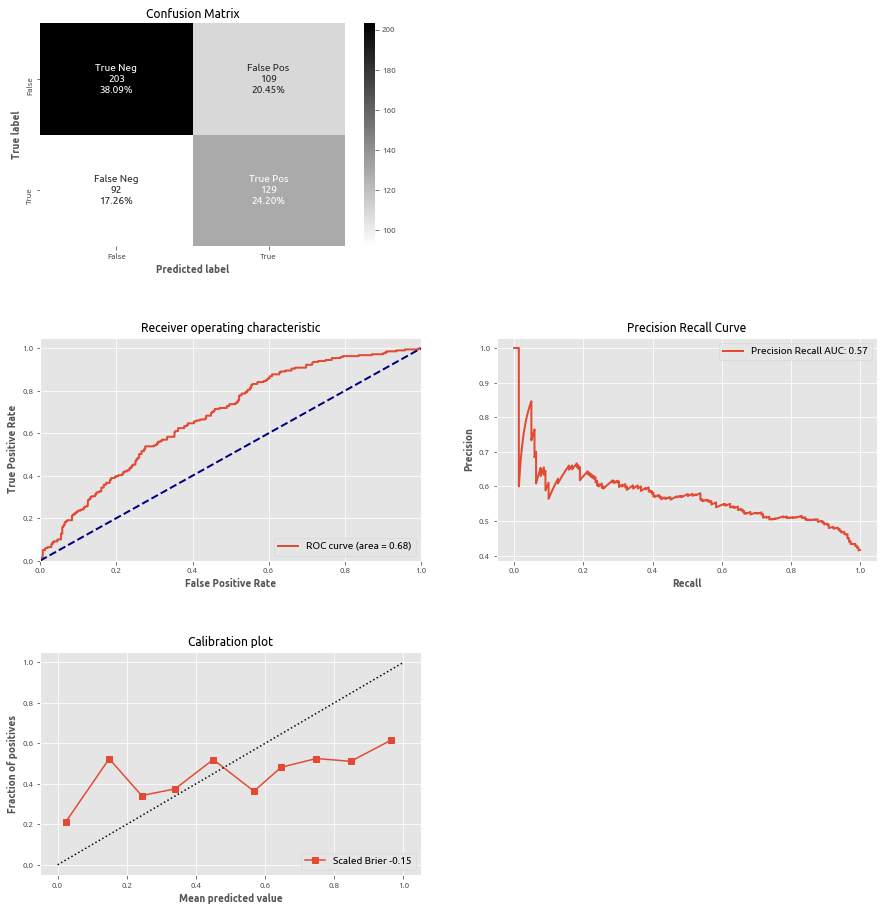

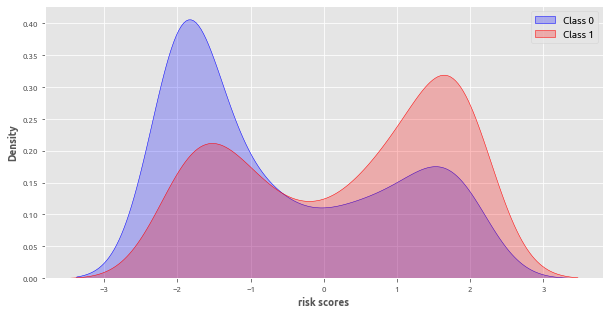

,,
,,
Ground Truth Prevalence,. . .,0.415
Test set Prevalence,. . .,0.447
True positive rate (recall),. . .,0.584
False positive rate,. . .,0.349
Positive predictive value (precision),. . .,0.542
True negative rate (specificity),. . .,0.651
False negative rate,. . .,0.416
Negative predictive value,. . .,0.688
Positive likelihood ratio (bigger is better),. . .,1.671


In [124]:
import MLFlow_Utils
binary_classification_metrics(y_test_single, y_pred, y_pred_prob1)

In [125]:
fprate, tprate, thresholds = roc_curve(y_test_single, y_pred_prob1, pos_label=1)
auc(fprate, tprate)

0.6803065900916581

In [126]:
#ROC_AUC
["{0:0.2f}".format(i) for i in AUC_CI(y_test_single, y_pred_prob1)]

['0.64', '0.73']

In [127]:
# y_test_single

In [128]:
#recall
tpr(y_test_single, y_pred)

0.583710407239819

In [129]:
#specificidade
tnr(y_test_single, pd.Series(y_pred))

0.6506410256410257

In [130]:
#accuracy
accuracy(y_test_single, y_pred)

0.6228893058161351

In [131]:
ppv(y_test_single, y_pred)

0.542016806722689

In [132]:
npv(y_test_single, y_pred)

0.688135593220339

# End of File